### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Generate Exponentialy Leaky Integrate-and-Fire Model

In [60]:
def e_lif_model(T, dt, time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, V_rest, deltaT, tw, a, b, urest, counter, w, thetaRH, I = 0, Alternative = False, startRange = 0, endRange = 0):
    tau_m = Rm*Cm
    Vm = np.zeros(len(time))
    IRange = []
    if (Alternative):
        for i, t in enumerate(time):
            tempRandI = random.randrange(startRange, endRange)
            IRange.append(tempRandI)
            if t > t_rest:
                w = w + ( dt / tw ) * ( a * (Vm[i-1] - V_rest) - w + b * tw * counter )
                Vm[i] = Vm[i - 1] + ((-Vm[i - 1] + V_rest - Rm * w + tempRandI * Rm + deltaT * (np.exp((Vm[i - 1]- thetaRH)/deltaT))) / tau_m) * dt
                if Vm[i] > Vth:
                    counter += 1
                    Vm[i] += V_spike      
                    t_rest = t + tau_ref
            else:
                Vm[i] = V_rest        
    else:    
        for i, t in enumerate(time):
            IRange.append(I)
            if t > t_rest:
                w = w + ( dt / tw ) * ( a * (Vm[i-1] - V_rest) - w + b * tw * counter )
                Vm[i] = Vm[i - 1] + ((-Vm[i - 1] + V_rest - Rm * w + I * Rm + deltaT * (np.exp((Vm[i - 1]- thetaRH)/deltaT))) / tau_m) * dt
                if Vm[i] > Vth:
                    counter += 1
                    Vm[i] += V_spike      
                    t_rest = t + tau_ref
            else:
                Vm[i] = V_rest
    return time, Vm, IRange

### Plot ELIF

In [61]:
def plot_elif(model):
    [time, Vm, _] = model
    # plot membrane potential trace
    plt.plot(time, Vm)
    plt.title('Adaptive Exponentially Leaky Integrate-and-Fire')
    plt.ylabel('U(V)')
    plt.xlabel('Time (msec)')
    plt.show()

### Dwar I - T Plot

In [62]:
def plot_i_t(model):
    [time, _, IRange] = model
    plt.plot(time, IRange)
    plt.title('I and Time')
    plt.ylabel('I(A)')
    plt.xlabel('Time (msec)')
    plt.show()

### Create Model

In [63]:
T = 100 # total time to simulate (msec)
dt = 0.125 # simulation time step (msec)
time = np.arange(0, T+dt, dt) # time array
t_rest = 0 # initial refractory time
Rm = 1 # resistance (kOhm)
Cm = 10 # capacitance (uF)
tau_ref = 1 # refractory period (msec)
Vth = 3 # spike threshold (V)
V_spike = 0.5 # spike delta (V)
I = 5 # input current (A)
V_rest = 0
deltaT = 0.5
tw = 1
a = 1
b = 1
urest = 0
counter = 0
w = 0
thetaRH = 1
model_1 = e_lif_model(T, dt, time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, V_rest, deltaT, tw, a, b, urest, counter, w, thetaRH, I)

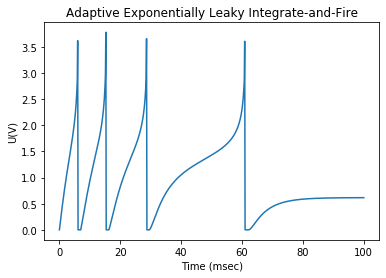

In [64]:
plot_elif(model_1)

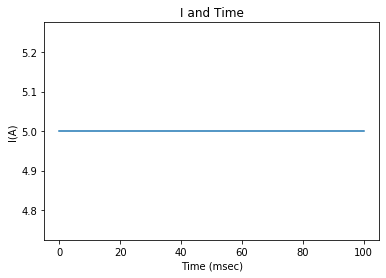

In [65]:
plot_i_t(model_1)

In [66]:
model_alt = e_lif_model(T, dt, time, t_rest, Rm, Cm, tau_ref, Vth, V_spike, V_rest, deltaT, tw, a, b, urest, counter, w, thetaRH, Alternative=True, startRange=10, endRange=20)

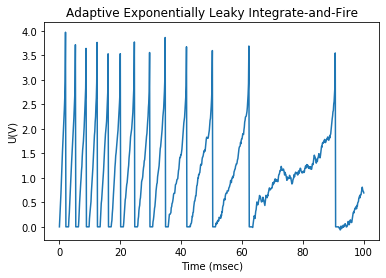

In [67]:
plot_elif(model_alt)

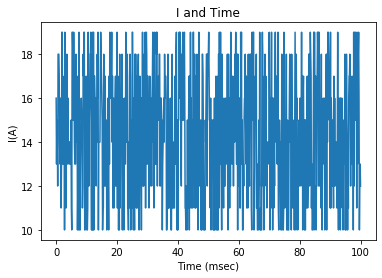

In [68]:
plot_i_t(model_alt)